<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Phyton_kriging: Theoretical variogram </font>
</div>

- **Fecha**: 2023/04/03
        
- **Objetivos**: 2D Theoretical variogram 

- **Descripción** Tutorial for determining how it works

- **Referencias**: -

- **Autores**: 
    - Luis Miguel Sánchez Brea

In [16]:
%load_ext autoreload
%autoreload 2

In [17]:
import numpy as np
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

In [18]:
from matplotlib import rcParams
rcParams['figure.dpi'] = 100 


# Theoretical variogram 



In [19]:
from phyton_kriging import np, sp, plt
from phyton_kriging import mm, degrees
from phyton_kriging.variogram_2D import theoretical

In [20]:
hx=np.linspace(0,10,51)
hy=np.linspace(0,10,53)

Hx,Hy=np.meshgrid(hx,hy)

# different kinds for storaging positions
H0 = (hx, hy)
H1 = (Hx, Hy)
H2 = (Hx.flatten(), Hy.flatten())
H3 = np.vstack((Hx, Hy))
H4 = np.vstack((Hx.flatten(), Hy.flatten()))

hx = np.random.uniform(0, 10, 512)
hy = np.random.uniform(0, 10, 512)
H5 = (hx,hy)

## Distintos tipos de variables de entrada

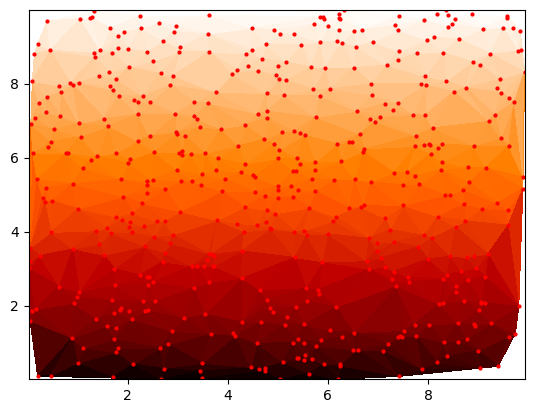

[ 123.1998  367.498   557.518   310.0388  804.6823  320.3816  396.7021
  310.5246  336.2757  110.7236  842.4578  962.8918  389.3444  623.7824
  969.7577  906.4828  310.8148  895.4686  603.9933  311.2136  301.4184
  479.9803  484.3924  613.4909  850.7236   37.0553  637.3224  372.2257
  255.2162  723.6042  346.395   952.3975  864.7715  216.0845   46.0136
  618.6742  613.8052  280.0144  646.1879  631.246   349.5823  853.5853
  821.5299  300.2553  610.5613  897.9087  615.996   152.4213  682.0676
  506.8245  239.7896  535.3     337.5359  997.9592  574.2671  416.2153
  322.5669  642.8273  980.7436  549.6898   22.7325  126.3933  889.8647
  480.687   689.2891  804.5243  596.3544  201.6155  547.3496  570.6654
  338.8504  717.7791  890.7388  616.0186  863.2443  658.8249  541.109
  707.725   955.6191  569.0147  980.8231  595.2776  126.5957  544.7689
  911.3443   86.9893  603.4765  582.4813  434.8775  980.5315  249.6478
  970.1014    7.4991  105.9135  733.2134  335.9307  428.6197  375.7418
  287.7

In [55]:
var_theo = theoretical(H5, make_2D=True)
var_theo.lineal(sc=1, lc=(1, 100), angle=0)
var_theo.draw3()
print(var_theo.variogram)


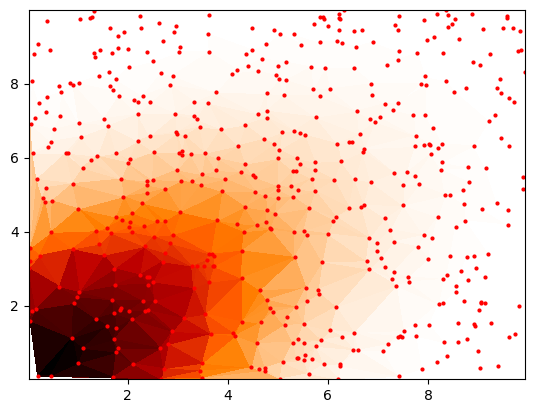

name = gauss

hx: min - 0.025394094683868218, max - 9.925722793620075
hx: min - 0.007728393846185844, max - 9.996142249060927
variogram: min - 1.0028077999308675, max - 1.999869121818279
parameters = {'sc': 1, 'A': 1, 'lc': (5, 2.5), 'angle': 0.7853981633974483, 'power': None}



In [22]:
var_theo = theoretical(H5, make_2D=True)
var_theo.gauss(sc=1, A=1, lc=(5,2.5), angle=45 * degrees)
var_theo.draw3()
print(var_theo)

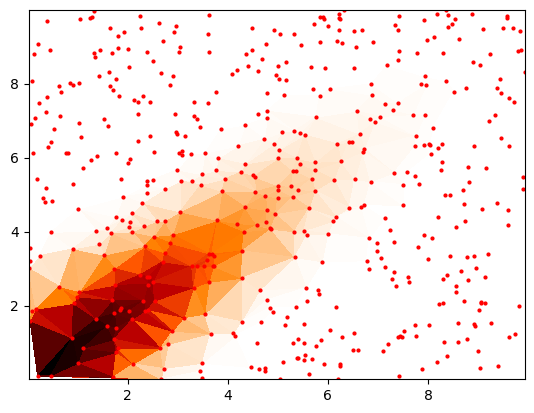

name = gauss

hx: min - 0.025394094683868218, max - 9.925722793620075
hx: min - 0.007728393846185844, max - 9.996142249060927
variogram: min - 1.008168862721658, max - 2.0
parameters = {'sc': 1, 'A': 1, 'lc': (5, 1), 'angle': 0.7853981633974483, 'power': None}



In [23]:
var_theo = theoretical(H5)
var_theo.gauss(sc=1, A=1, lc=(5,1), angle=45*degrees)
var_theo.draw3()
print(var_theo)


## Distintos tipos de variogramas

ValueError: The length of c must match either the number of points or the number of triangles

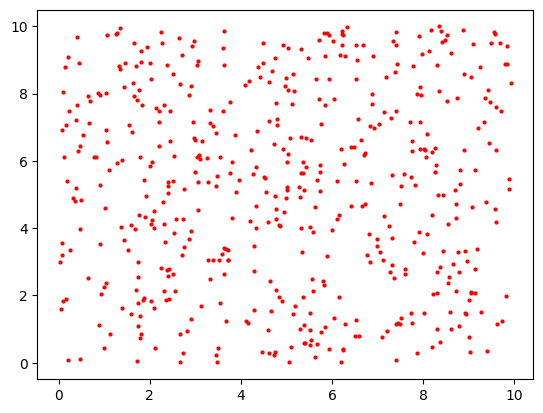

In [24]:
var_theo = theoretical(h=H5)
var_theo.constant(sc=1)
var_theo.draw3(kind='standard')


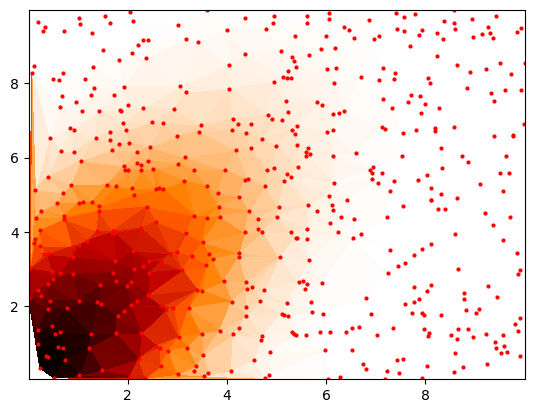

name = gauss

hx: min - 0.0012923245501872405, max - 9.997451171572715
hx: min - 0.026683505742430835, max - 9.983722274832395
variogram: min - 1.0064393907449616, max - 1.9999999795376917
parameters = {'sc': 1, 'A': 1, 'lc': (5, 2), 'angle': 45, 'power': None}



In [10]:
var_theo = theoretical(h=H5)
var_theo.gauss(sc=1, A=1, lc=(5,2), angle=45)
var_theo.draw3(kind='standard')
print(var_theo)

In [11]:
var_theo = theoretical(h=H5)
var_theo.spherical(sc=1, A=1, lc=(5,2), angle=45*degrees)
var_theo.draw3()
print(var_theo)

ValueError: operands could not be broadcast together with shapes (2,512) (2,) 

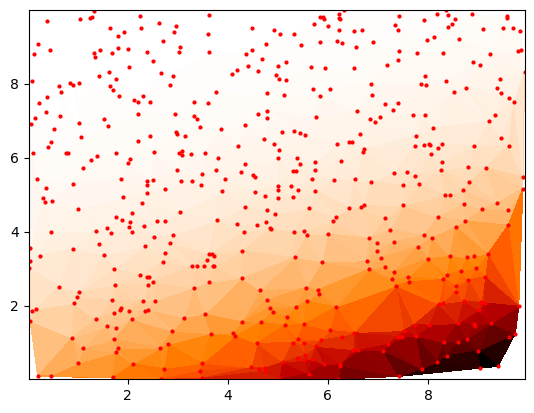

name = exponential

hx: min - 0.025394094683868218, max - 9.925722793620075
hx: min - 0.007728393846185844, max - 9.996142249060927
variogram: min - -4.151783185712014, max - 1.9910063324757195
parameters = {'sc': 1, 'A': 1, 'lc': (5, 2), 'angle': 0.7853981633974483, 'power': 2}



In [25]:
var_theo = theoretical(h=H5)
var_theo.exponential(sc=1, A=1, lc=(5,2), angle=45*degrees, power=2)
var_theo.draw3(kind='standard')
print(var_theo)

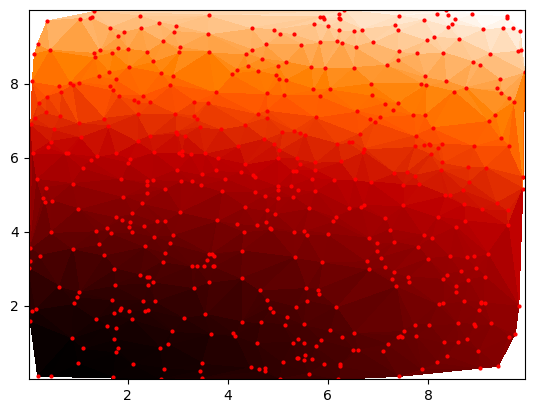

name = potential

hx: min - 0.025394094683868218, max - 9.925722793620075
hx: min - 0.007728393846185844, max - 9.996142249060927
variogram: min - 1.0048022398470908, max - 30.90013472601957
parameters = {'sc': 1, 'A': 1, 'lc': (4, 2), 'angle': 0.7853981633974483, 'power': 2}



In [26]:
var_theo = theoretical(h=H5)
var_theo.potential(sc=1, A=1, lc=(4,2), angle=45*degrees, power=2)
var_theo.draw3()
print(var_theo)

### using dictionary

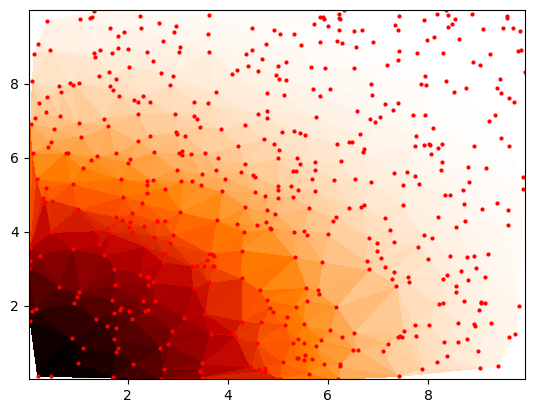

In [27]:
var_theo = theoretical(h=H5)
params = dict(sc=1, A=1, lc=5, angle=45*degrees)
var_theo.gauss(**params)
var_theo.draw3()

### Once defined the parameters, get the values for other h

ValueError: The length of c must match either the number of points or the number of triangles

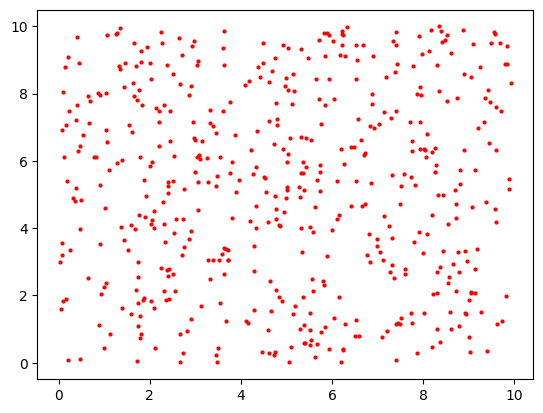

In [28]:
h_newx = np.random.rand(0,5,100)
h_newy = np.random.rand(0,5,100)
h_new = (h_newx, h_newy)

v_new = var_theo.get(h_new)
var_theo.draw3('standard')

### Cambiamos parametros

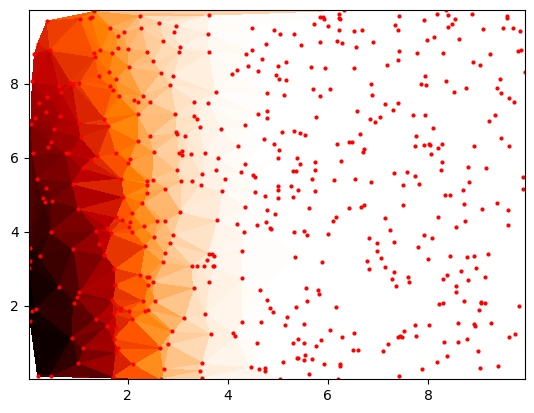

In [29]:
params = dict(sc=1, A=1, lc=(10,2), angle=90*degrees, power=2)
var_theo.gauss(**params)
var_theo.draw3('standard')

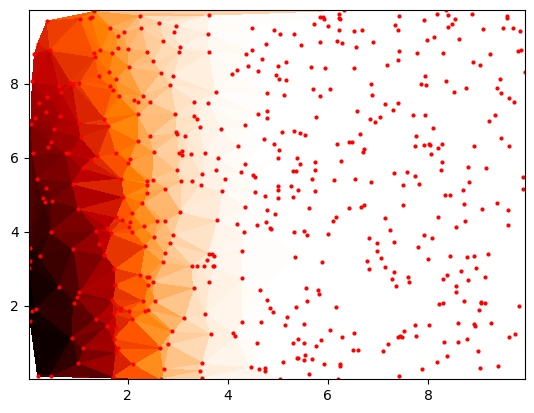

In [30]:
var_theo.type = 'constant'
var_theo.draw3('standard')

### Get data

In [31]:
v_new = var_theo.get(h_new)
print(v_new)

[]
